In [3]:
#imports
import tkinter
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import numpy as np
import math
from PIL import Image
import pandas as pd 

#loading dataframe
df_craters = pd.read_csv('Downloads/mooncrater/mooncrater.csv')

'"\n#tk setup(external widget to open graph popup)\ncanvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.\ncanvas.draw()\ncanvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)\ntoolbar = NavigationToolbar2Tk(canvas, root)\ntoolbar.update()\ncanvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)\ndef on_key_press(event):\n    print("you pressed {}".format(event.key))\n    key_press_handler(event, canvas, toolbar)\ncanvas.mpl_connect("key_press_event", on_key_press)\ndef _quit():\n    root.quit()     # stops mainloop\n    root.destroy()  # this is necessary on Windows to prevent\n                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate\nbutton = tkinter.Button(master=root, text="Quit", command=_quit)\nbutton.pack(side=tkinter.BOTTOM)\ntkinter.mainloop()\n'

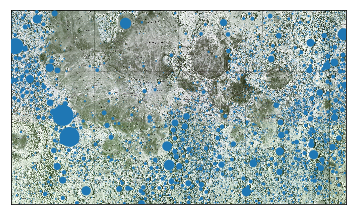

In [12]:
#tinker root
root = tkinter.Tk()
root.wm_title("Embedding in Tk")

#set figure
fig     = plt.figure()
ax      = fig.add_subplot(111)

#mapping projection to xy
#add lattitude of true scale lat_ts, if zooming in
map = Basemap(llcrnrlon=-100,llcrnrlat=-50,urcrnrlon=100,urcrnrlat=50
             , projection='merc')

#loading projection image
image = Image.open('Desktop/moon mercator projection1.jpg')
map.imshow(image,origin='upper')


#adding craters/domes 
lats = df_craters['LAT_CIRC_IMG'].values
lons = df_craters['LON_CIRC_IMG'].values
lons_1 = []
x=0
for value in lons:
    if value>180:
        x = -(360-value)
        lons_1.append(x)
    else:
        lons_1.append(value)
        
patchs = []
diams = df_craters['DIAM_CIRC_IMG'].values 
for i in range(len(lats)):
    if lats[i]> 50 or lats[i]<-50 or lons_1[i]>100 or lons_1[i]<-100:
        continue
    x,y = map(lons_1[i],lats[i])
    diam = diams[i]
    if diam >500:
        continue
    else:
        patch = Circle((x,y),radius=diam*1500,linewidth=3,color='r',fill=False)
        
    patchs.append(patch)

p = PatchCollection(patchs,zorder=10)
ax.add_collection(p)  
plt.savefig('Desktop/craters_topography_again5.png',dpi = 720 ,bbox_inches='tight')




""""
#tk setup(external widget to open graph popup)
canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
def on_key_press(event):
    print("you pressed {}".format(event.key))
    key_press_handler(event, canvas, toolbar)
canvas.mpl_connect("key_press_event", on_key_press)
def _quit():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate
button = tkinter.Button(master=root, text="Quit", command=_quit)
button.pack(side=tkinter.BOTTOM)
tkinter.mainloop()
"""


In [5]:
print(map(100,50))

(22238974.856936235, 12878119.126099925)
